In [1]:
import pandas as pd

In [48]:
df=pd.read_csv("Train_data_v2.csv")
test_df = pd.read_csv("Train_data_v2.csv")

In [49]:
df=df.drop(["FarmerID","Zipcode","Location","Address type"], axis="columns")
test_df=test_df.drop(["FarmerID","Zipcode","Location","Address type"], axis="columns")

In [4]:
df.head()

,State,REGION,SEX,CITY,DISTRICT,VILLAGE,MARITAL_STATUS,Ownership,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,MADHYA PRADESH,CENTRAL,M,BARELI,RAISEN,Seoni,M,NaN,0,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.38,33.53,Poor,0.77,0.00,1360000
1,BIHAR,EAST,M,BANDRA,MUZAFFARPUR,Namapur,M,NaN,1,74000.000000,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.63,37.17,Poor,0.45,0.00,807200
2,MADHYA PRADESH,CENTRAL,M,MALHARGARH,MANDSAUR,Billaud,M,NaN,14,232999.857143,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.49,28.85,Poor,0.66,0.00,500000
3,MAHARASHTRA,WEST,M,RENAPUR,LATUR,Renapur,M,NaN,0,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.84,48.85,Average,0.24,2.49,558000
4,MADHYA PRADESH,CENTRAL,F,KHURAI,SAGAR,Singhpur,M,NaN,3,138203.000000,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.33,31.82,Poor,0.21,0.00,800000


In [50]:
# Drop constant or almost constant columns
df = df.loc[:, df.nunique() > 1]
test_df = test_df.loc[:, test_df.nunique() > 1]
# Drop columns with >30-40% missing values (tweak threshold)
df = df.loc[:, df.isnull().mean() < 0.4]
test_df = test_df.loc[:, test_df.isnull().mean() < 0.4]


In [ ]:
cols = [
    "K022-Ambient temperature (min & max)",
    "K021-Ambient temperature (min & max)",
    "R021-Ambient temperature (min & max)",
    "R020-Ambient temperature (min & max)"
]

for col in cols:
    df[col] = df[col].apply(lambda val: 
        (float(val.split('/')[0]) + float(val.split('/')[1])) / 2 if isinstance(val, str) and '/' in val else val
    )
    test_df[col] = test_df[col].apply(lambda val: 
        (float(val.split('/')[0]) + float(val.split('/')[1])) / 2 if isinstance(val, str) and '/' in val else val
    )


In [52]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = test_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['State', 'REGION', 'SEX', 'CITY', 'DISTRICT', 'VILLAGE',
       'MARITAL_STATUS', 'Ownership',
       'K022-Village category based on Agri parameters (Good, Average, Poor)',
       'K022-Nearest Mandi Name',
       'K022-Village category based on socio-economic parameters (Good, Average, Poor)',
       'R022-Village category based on Agri parameters (Good, Average, Poor)',
       'R022-Ambient temperature (min & max)',
       'Kharif Seasons  Type of soil in 2022',
       'Kharif Seasons  Type of water bodies in hectares 2022',
       'Kharif Seasons  Agro Ecological Sub Zone in 2022',
       'Rabi Seasons Type of soil in 2022',
       'Rabi Seasons Type of water bodies in hectares 2022',
       'Rabi Seasons Agro Ecological Sub Zone in 2022',
       'Rabi Seasons Type of soil in 2021',
       'Rabi Seasons Type of water bodies in hectares 2021',
       'Rabi Seasons Agro Ecological Sub Zone in 2021',
       'Kharif Seasons Type of soil in 2021',
       'Kharif Seasons Type of w

In [53]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    test_df[col] = le.fit_transform(test_df[col])

In [9]:
df.head()

,State,REGION,SEX,CITY,DISTRICT,VILLAGE,MARITAL_STATUS,Ownership,No_of_Active_Loan_In_Bureau,Non_Agriculture_Income,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,9,0,1,224,294,4261,0,3,0,100000.0,...,1,97.24,19.50,0.95,22.38,33.53,2,0.77,0.00,1360000
1,2,1,1,193,246,3407,0,3,1,500000.0,...,2,73.96,16.76,0.97,24.63,37.17,2,0.45,0.00,807200
2,9,0,1,1394,230,938,0,3,14,492500.0,...,0,90.05,22.44,0.95,19.49,28.85,2,0.66,0.00,500000
3,10,4,1,1997,212,4043,0,3,0,40000.0,...,3,94.64,21.48,0.98,31.84,48.85,0,0.24,2.49,558000
4,9,0,0,1184,311,4376,0,3,3,150000.0,...,1,95.90,18.93,0.97,21.33,31.82,2,0.21,0.00,800000


In [8]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['Target_Variable/Total Income','Non_Agriculture_Income'], axis=1)
y = df['Target_Variable/Total Income']

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
important_feats = importances.sort_values(ascending=False)
print(important_feats.head(20))  # Top 20 features


Total_Land_For_Agriculture                                             0.213888
No_of_Active_Loan_In_Bureau                                            0.134689
Ownership                                                              0.108851
DISTRICT                                                               0.021735
MARITAL_STATUS                                                         0.019192
K022-Net Agri area (% of total geog area)-                             0.018556
VILLAGE                                                                0.017863
CITY                                                                   0.016437
 Road density (Km/ SqKm)                                               0.016087
perc_of_pop_living_in_hh_electricity                                   0.014260
K021-Seasonal Average Rainfall (mm)                                    0.012103
Women_15_19_Mothers_or_Pregnant_at_time_of_survey                      0.012028
SEX                                     

In [9]:
top_feats = importances[importances > 0.008].index.tolist()


In [58]:
X_top = X[top_feats]
X_test = test_df[top_feats]
X_test.columns

Index(['SEX', 'CITY', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Total_Land_For_Agriculture',
       'K022-Proximity to nearest railway (Km)',
       'K021-Seasonal Average Rainfall (mm)',
       'R021-Ambient temperature (min & max)',
       'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
       'perc_of_pop_living_in_hh_electricity',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'Households_with_improved_Sanitation_Facility',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'K022-Net Agri area (in Ha)-',
       'K022-Net Agri area (% of total geog area)-',
       'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
       'Rabi Seasons Cropping density in 2022',
       'Rabi Seasons Kharif Season Irrigated area in 2020',
       'Rabi Seasons Agricultural Score in 2020',
       ' Land Holding Index source (Total Agri Area/ no of pe

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []

for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform on y_train and y_test
    y_train_log = np.log1p(y_train)
    
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # back to original scale

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (after log transform):", np.mean(mape_scores))



Mean MAPE (after log transform): 0.2807955701465433


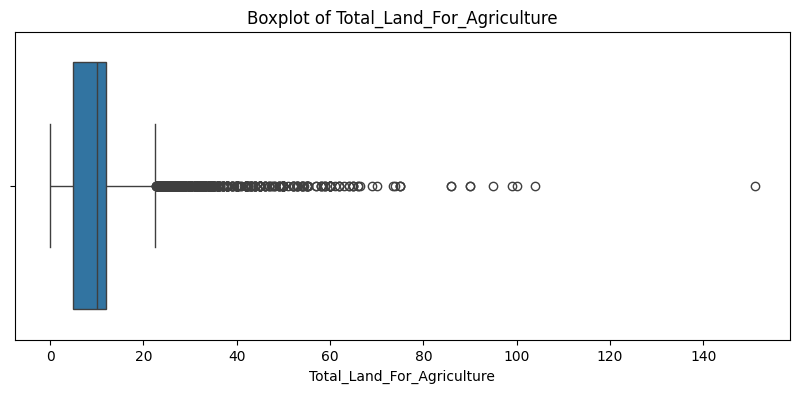

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Total_Land_For_Agriculture'])
plt.title('Boxplot of Total_Land_For_Agriculture')
plt.show()

In [13]:
# Compute IQR bounds
Q1 = df['Total_Land_For_Agriculture'].quantile(0.25)
Q3 = df['Total_Land_For_Agriculture'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers
df['Total_Land_For_Agriculture'] = df['Total_Land_For_Agriculture'].clip(lower=lower_bound, upper=upper_bound)


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []

for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform on y_train and y_test
    y_train_log = np.log1p(y_train)
    
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # back to original scale

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (after log transform):", np.mean(mape_scores))



Mean MAPE (after log transform): 0.2809292845825737


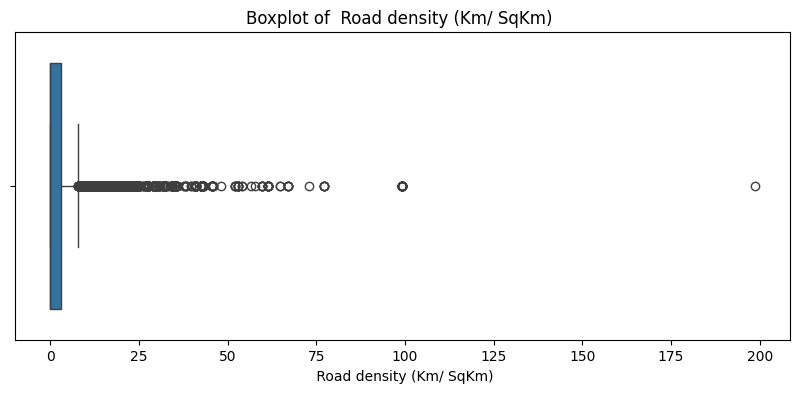

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df[' Road density (Km/ SqKm)'])
plt.title('Boxplot of  Road density (Km/ SqKm) ')
plt.show()

In [17]:
# Compute IQR bounds
Q1 = df[' Road density (Km/ SqKm)'].quantile(0.25)
Q3 = df[' Road density (Km/ SqKm)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers
df[' Road density (Km/ SqKm)'] = df[' Road density (Km/ SqKm)'].clip(lower=lower_bound, upper=upper_bound)

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []

for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform on y_train and y_test
    y_train_log = np.log1p(y_train)
    
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # back to original scale

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (after fixing total area and road density outliers):", np.mean(mape_scores))



Mean MAPE (after fixing total area and road density outliers): 0.2805842697672781


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []

for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + log1p transform):", np.mean(mape_scores))


Mean MAPE (XGBoost + log1p transform): 0.26647499203681946


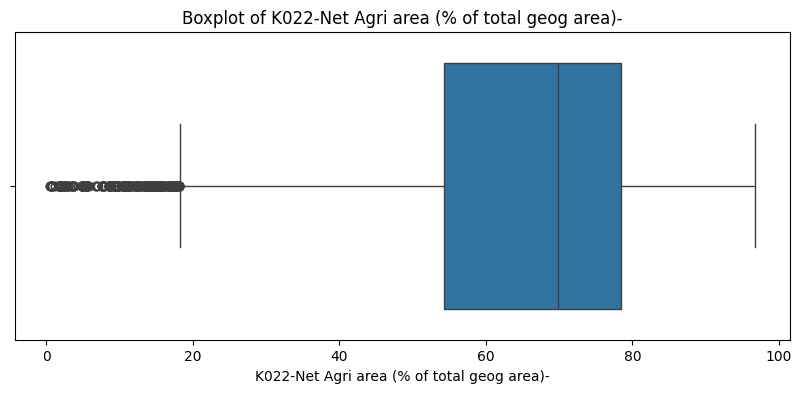

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['K022-Net Agri area (% of total geog area)-'])
plt.title('Boxplot of K022-Net Agri area (% of total geog area)-')
plt.show()

In [20]:
# Compute IQR bounds
Q1 = df['K022-Net Agri area (% of total geog area)-'].quantile(0.25)
Q3 = df['K022-Net Agri area (% of total geog area)-'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers
df['K022-Net Agri area (% of total geog area)-'] = df['K022-Net Agri area (% of total geog area)-'].clip(lower=lower_bound, upper=upper_bound)

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []

for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area):", np.mean(mape_scores))


Mean MAPE (XGBoost + Outliers removed from net area): 0.26647499203681946


In [29]:
# Drop columns with exactly 157 missing values
missing_157_cols = X_top.columns[X_top.isnull().sum() == 157]
X_top = X_top.drop(columns=missing_157_cols)

# Impute missing values in 'Total_Land_For_Agriculture' with its mean
X_top['Total_Land_For_Agriculture'] = X_top['Total_Land_For_Agriculture'].fillna(X_top['Total_Land_For_Agriculture'].mean())

print(X_top.isnull().sum())


SEX                                                                    0
CITY                                                                   0
DISTRICT                                                               0
VILLAGE                                                                0
MARITAL_STATUS                                                         0
Ownership                                                              0
No_of_Active_Loan_In_Bureau                                            0
Total_Land_For_Agriculture                                             0
K022-Proximity to nearest railway (Km)                                 0
K021-Seasonal Average Rainfall (mm)                                    0
R021-Ambient temperature (min & max)                                   0
K022-Net Agri area (in Ha)-                                            0
K022-Net Agri area (% of total geog area)-                             0
Kharif Seasons  Seasonal average groundwater thickn

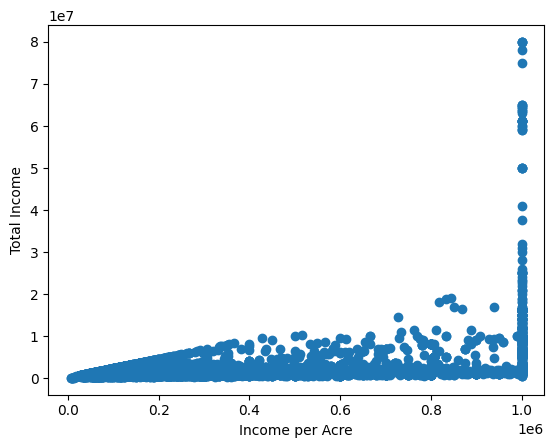

In [22]:
import matplotlib.pyplot as plt

df['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
upper_cap = df['income_per_acre'].quantile(0.99)
df['income_per_acre'] = np.where(df['income_per_acre'] > upper_cap, upper_cap, df['income_per_acre'])

plt.scatter(df['income_per_acre'], df['Target_Variable/Total Income'])
plt.xlabel("Income per Acre")
plt.ylabel("Total Income")
plt.show()


In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []
X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area+income per acre):", np.mean(mape_scores))


Mean MAPE (XGBoost + Outliers removed from net area+income per acre): 0.01695384494960308


In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []
X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
X_top['total_land']=df['Total_Land_For_Agriculture'].replace(0, 1e-5)*df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land):", np.mean(mape_scores))


Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land): 0.016722046583890916


In [39]:
X_top.columns

Index(['SEX', 'CITY', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Total_Land_For_Agriculture',
       'K022-Proximity to nearest railway (Km)',
       'K021-Seasonal Average Rainfall (mm)',
       'R021-Ambient temperature (min & max)', 'K022-Net Agri area (in Ha)-',
       'K022-Net Agri area (% of total geog area)-',
       'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
       'Rabi Seasons Cropping density in 2022',
       'Rabi Seasons Kharif Season Irrigated area in 2020',
       'Rabi Seasons Agricultural Score in 2020',
       ' Land Holding Index source (Total Agri Area/ no of people)',
       ' Road density (Km/ SqKm)', 'income_per_acre', 'total_land'],
      dtype='object')

In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []
X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
X_top['total_land']=df['Total_Land_For_Agriculture'].replace(0, 1e-5)*df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
X_top['Effective_usage']=X_top['Total_Land_For_Agriculture'].replace(0, 1e-5) / X_top['K022-Net Agri area (% of total geog area)-'].replace(0, 1e-5)
for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
  
    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value):", np.mean(mape_scores))


Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value): 0.0163941852748394


In [44]:

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []
X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
X_top['total_land']=df['Total_Land_For_Agriculture'].replace(0, 1e-5)*df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
X_top['Effective_usage']=X_top['Total_Land_For_Agriculture'].replace(0, 1e-5) / X_top['K022-Net Agri area (% of total geog area)-'].replace(0, 1e-5)
X_top['Credit_Access_Impact']=(1-df['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'])*X_top['income_per_acre'].replace(0, 1e-5)
for train_index, test_index in kf.split(X_top):
    X_train, X_test = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply log1p transform to y_train
    y_train_log = np.log1p(y_train)

    # Train XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    model.fit(X_train, y_train_log)

    # Predict and reverse log transform
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Avoid division by zero
    y_test_safe = y_test.replace(0, 1e-5)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_safe, y_pred)
    mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value+productivity with elecvtricity):", np.mean(mape_scores))


Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value+productivity with elecvtricity): 0.018068493530154228


In [59]:

y_test = test_df['Target_Variable/Total Income']
X_test.columns

Index(['SEX', 'CITY', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Total_Land_For_Agriculture',
       'K022-Proximity to nearest railway (Km)',
       'K021-Seasonal Average Rainfall (mm)',
       'R021-Ambient temperature (min & max)',
       'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
       'perc_of_pop_living_in_hh_electricity',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'Households_with_improved_Sanitation_Facility',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'K022-Net Agri area (in Ha)-',
       'K022-Net Agri area (% of total geog area)-',
       'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
       'Rabi Seasons Cropping density in 2022',
       'Rabi Seasons Kharif Season Irrigated area in 2020',
       'Rabi Seasons Agricultural Score in 2020',
       ' Land Holding Index source (Total Agri Area/ no of pe

In [61]:

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scores = []
X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
X_top['total_land']=df['Total_Land_For_Agriculture'].replace(0, 1e-5)*df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
X_top['Effective_usage']=X_top['Total_Land_For_Agriculture'].replace(0, 1e-5) / X_top['K022-Net Agri area (% of total geog area)-'].replace(0, 1e-5)
X_top['Credit_Access_Impact']=(1-df['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'])*X_top['income_per_acre'].replace(0, 1e-5)
X_test['income_per_acre'] = test_df['Target_Variable/Total Income'] / test_df['Total_Land_For_Agriculture'].replace(0, 1e-5)
X_test['total_land']=test_df['Total_Land_For_Agriculture'].replace(0, 1e-5)*test_df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
X_test['Effective_usage']=X_test['Total_Land_For_Agriculture'].replace(0, 1e-5) / X_test['K022-Net Agri area (% of total geog area)-'].replace(0, 1e-5)
X_test['Credit_Access_Impact']=(1-test_df['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'])*X_test['income_per_acre'].replace(0, 1e-5)
X_train = X_top.iloc[train_index]
y_train = y.iloc[train_index]

# Apply log1p transform to y_train
y_train_log = np.log1p(y_train)

# Train XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
model.fit(X_train, y_train_log)

# Predict and reverse log transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Avoid division by zero
y_test_safe = y_test.replace(0, 1e-5)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_safe, y_pred)
mape_scores.append(mape)

print("Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value+productivity with elecvtricity):", np.mean(mape_scores))


C:\Users\Maurya\AppData\Local\Temp\ipykernel_19204\281196232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top['income_per_acre'] = df['Target_Variable/Total Income'] / df['Total_Land_For_Agriculture'].replace(0, 1e-5)
C:\Users\Maurya\AppData\Local\Temp\ipykernel_19204\281196232.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top['total_land']=df['Total_Land_For_Agriculture'].replace(0, 1e-5)*df[' Road density (Km/ SqKm)'].replace(0, 1e-5)
C:\Users\Maurya\AppData\Local\Temp\ipykernel_19204\281

Mean MAPE (XGBoost + Outliers removed from net area+income per acre+total land+effecitve usage value+productivity with elecvtricity): 0.011231845244765282
